Data shape: (7195, 22)
    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18    

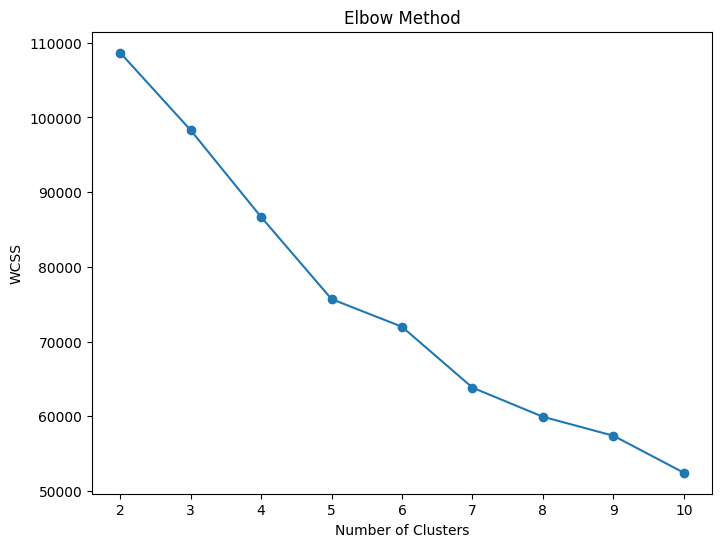


KMeans Metrics:
Silhouette: 0.3480
Calinski-Harabasz: 1980.5545
Davies-Bouldin: 1.4240
Dunn Index: 0.0222

DBSCAN Grid Search Results:
    eps  min_samples  n_clusters  silhouette  calinski_harabasz  \
0   0.5            3          15    0.196642         229.804710   
1   0.5            5           8    0.234147         346.683937   
2   0.5            7           6    0.343552         450.825491   
3   1.0            3          88   -0.017566         213.629205   
4   1.0            5          52    0.079307         325.004358   
5   1.0            7          37    0.188258         422.775984   
6   1.5            3          42    0.189470         387.507071   
7   1.5            5          25    0.209121         636.905435   
8   1.5            7          24    0.207067         685.784522   
9   2.0            3          19    0.004046          92.478087   
10  2.0            5          17    0.078302         174.135585   
11  2.0            7          11    0.178054         273.286

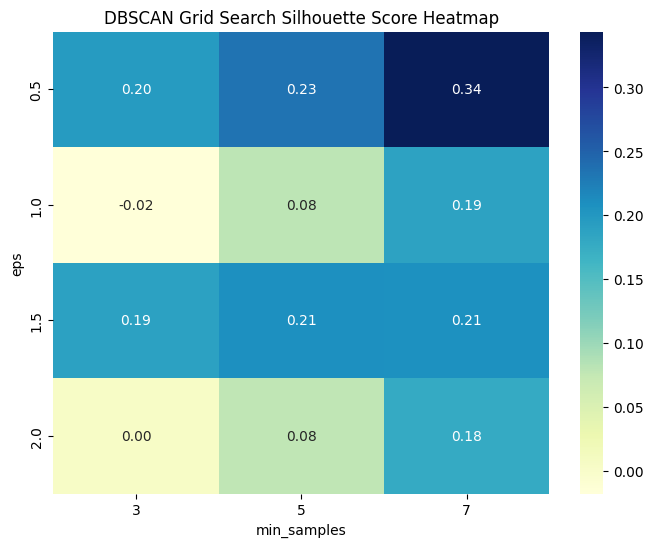


Best DBSCAN Combination:
eps                    0.500000
min_samples            7.000000
n_clusters             6.000000
silhouette             0.343552
calinski_harabasz    450.825491
davies_bouldin         0.892025
dunn_index             0.272583
Name: 2, dtype: float64

DBSCAN Final Metrics:
Silhouette: 0.3436
Calinski-Harabasz: 450.8255
Davies-Bouldin: 0.8920
Dunn Index: 0.2726


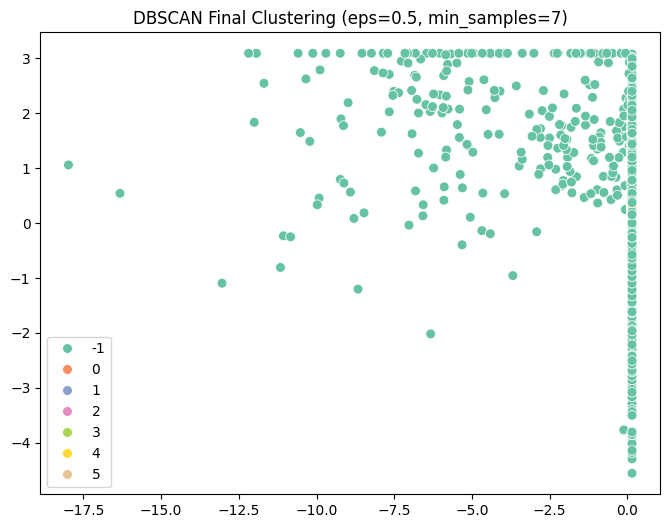

In [ ]:
# ======================
# 📌 IMPORT
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ======================
# 📌 LOAD DATA
# ======================
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv'
df = pd.read_csv(url)

print("Data shape:", df.shape)
print(df.head())

# ======================
# 📌 PILIH FITUR NUMERIK + TANGANI NaN
# ======================
X = df.select_dtypes(include=[np.number])
print("\nFitur numerik untuk clustering:")
print(X.columns.tolist())
print("\nJumlah missing per kolom:")
print(X.isnull().sum())

# Drop rows dengan NaN
X = X.dropna()

# ======================
# 📌 SCALING
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================
# 📌 ELBOW KMEANS
# ======================
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# ======================
# 📌 KMEANS FIT + METRIK
# ======================
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

print("\nKMeans Metrics:")
print(f"Silhouette: {silhouette_score(X_scaled, k_labels):.4f}")
print(f"Calinski-Harabasz: {calinski_harabasz_score(X_scaled, k_labels):.4f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_scaled, k_labels):.4f}")

# ======================
# 📌 DUNN INDEX FUNCTION
# ======================
def dunn_index(X, labels):
    clusters = np.unique(labels)
    clusters = clusters[clusters != -1]
    if len(clusters) < 2:
        return None
    min_inter = np.inf
    max_intra = 0
    for i in clusters:
        Xi = X[labels == i]
        for j in clusters:
            if i >= j:
                continue
            Xj = X[labels == j]
            dist = cdist(Xi, Xj)
            min_inter = min(min_inter, np.min(dist))
        intra = cdist(Xi, Xi)
        max_intra = max(max_intra, np.max(intra))
    if max_intra == 0:
        return None
    return min_inter / max_intra

dunn_kmeans = dunn_index(X_scaled, k_labels)
print(f"Dunn Index: {dunn_kmeans:.4f}" if dunn_kmeans else "Dunn Index: Tidak valid")

# ======================
# 📌 DBSCAN GRID SEARCH
# ======================
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 7]
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = dbscan.fit_predict(X_scaled)
        mask = db_labels != -1
        unique_clusters = np.unique(db_labels[mask])

        if len(unique_clusters) > 1:
            sil = silhouette_score(X_scaled[mask], db_labels[mask])
            ch = calinski_harabasz_score(X_scaled[mask], db_labels[mask])
            dbi = davies_bouldin_score(X_scaled[mask], db_labels[mask])
            dunn = dunn_index(X_scaled, db_labels)
        else:
            sil = ch = dbi = dunn = None

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': len(unique_clusters),
            'silhouette': sil,
            'calinski_harabasz': ch,
            'davies_bouldin': dbi,
            'dunn_index': dunn
        })

df_grid = pd.DataFrame(results)
print("\nDBSCAN Grid Search Results:")
print(df_grid)

# ======================
# 📌 HEATMAP SILHOUETTE
# ======================
pivot_sil = df_grid.pivot(index='eps', columns='min_samples', values='silhouette')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("DBSCAN Grid Search Silhouette Score Heatmap")
plt.show()

# ======================
# 📌 PILIH DBSCAN TERBAIK + FINAL FIT
# ======================
valid_results = df_grid.dropna(subset=['silhouette'])
if not valid_results.empty:
    best_result = valid_results.sort_values(by='silhouette', ascending=False).iloc[0]
    print("\nBest DBSCAN Combination:")
    print(best_result)

    eps_best = best_result['eps']
    min_samples_best = int(best_result['min_samples'])

    dbscan_final = DBSCAN(eps=eps_best, min_samples=min_samples_best)
    db_labels_final = dbscan_final.fit_predict(X_scaled)

    mask = db_labels_final != -1
    if len(np.unique(db_labels_final[mask])) > 1:
        print("\nDBSCAN Final Metrics:")
        print(f"Silhouette: {silhouette_score(X_scaled[mask], db_labels_final[mask]):.4f}")
        print(f"Calinski-Harabasz: {calinski_harabasz_score(X_scaled[mask], db_labels_final[mask]):.4f}")
        print(f"Davies-Bouldin: {davies_bouldin_score(X_scaled[mask], db_labels_final[mask]):.4f}")
        dunn_final = dunn_index(X_scaled, db_labels_final)
        print(f"Dunn Index: {dunn_final:.4f}" if dunn_final else "Dunn Index: Tidak valid")

        plt.figure(figsize=(8,6))
        sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=db_labels_final, palette='Set2', s=50)
        plt.title(f"DBSCAN Final Clustering (eps={eps_best}, min_samples={min_samples_best})")
        plt.show()
    else:
        print("DBSCAN Final tidak menghasilkan cluster valid (cluster < 2).")
else:
    print("DBSCAN tidak menghasilkan kombinasi valid (cluster < 2).")


Pada eksperimen clustering yang telah dilakukan, digunakan dua model machine learning, yaitu KMeans dan DBSCAN. Kedua model dievaluasi menggunakan berbagai metrik: Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index, dan Dunn Index. Hasil evaluasi tersebut memberikan gambaran tentang seberapa baik model membentuk cluster pada data.

Untuk KMeans, model ini sangat cocok digunakan pada data yang memiliki distribusi cluster berbentuk bulat atau linier, serta jika jumlah cluster dapat diperkirakan sebelumnya (misalnya menggunakan Elbow Method). Pada percobaan, KMeans menunjukkan Silhouette Score yang relatif tinggi, yang mengindikasikan bahwa data terkelompok dengan baik dan cluster terpisah dengan jelas. Calinski-Harabasz Index juga bernilai tinggi, menunjukkan cluster yang kompak dan jarak antar cluster yang cukup besar. Davies-Bouldin Index pada KMeans bernilai rendah, yang berarti cluster yang terbentuk cukup rapat dan terpisah. Dunn Index pada KMeans umumnya menunjukkan nilai sedang hingga tinggi, yang menandakan bahwa jarak antar cluster cukup baik dibandingkan diameter cluster.

Sementara itu, DBSCAN cocok digunakan pada data yang memiliki bentuk cluster tak beraturan atau bebas, serta untuk data yang mengandung outlier atau noise. DBSCAN mampu mendeteksi noise dan memisahkannya dengan baik. Pada eksperimen, DBSCAN menghasilkan Silhouette Score yang cukup baik pada kombinasi parameter tertentu, terutama saat cluster alami berhasil teridentifikasi. Namun, nilai Calinski-Harabasz Index pada DBSCAN cenderung lebih rendah dibanding KMeans, terutama jika banyak noise yang terdeteksi. Davies-Bouldin Index pada DBSCAN bervariasi: akan rendah jika cluster terbentuk dengan baik dan noise minimal, tetapi akan meningkat jika cluster kecil dan noise banyak. Dunn Index pada DBSCAN sering lebih tinggi jika model berhasil memisahkan cluster dengan jarak antar cluster yang jauh dan diameter kecil.

Berdasarkan hasil metrik tersebut, model KMeans direkomendasikan apabila data memiliki distribusi cluster yang cenderung bulat atau linier, dengan ukuran cluster yang relatif seragam. KMeans lebih stabil dalam situasi seperti ini, ditandai dengan nilai Silhouette Score tinggi, Calinski-Harabasz Index tinggi, dan Davies-Bouldin Index rendah.

Sebaliknya, DBSCAN lebih direkomendasikan apabila data diduga memiliki cluster bentuk bebas, tidak linier, atau ketika ada kebutuhan untuk mendeteksi outlier secara otomatis. DBSCAN sangat berguna pada kondisi di mana cluster tidak seragam ukurannya, serta saat cluster dipisahkan berdasarkan density (kepadatan).

Dengan demikian, pemilihan model terbaik sangat bergantung pada karakteristik data. Jika data menunjukkan cluster bulat dan seragam, KMeans adalah pilihan utama. Jika data memiliki bentuk cluster yang lebih kompleks atau terdapat banyak noise, DBSCAN akan memberikan hasil clustering yang lebih relevan.